# 1. Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 116s - loss: 1.5030 - acc: 0.4591 - val_loss: 1.2820 - val_acc: 0.5820
Epoch 2/10
40000/40000 [==============================] - 115s - loss: 1.1417 - acc: 0.5928 - val_loss: 1.1253 - val_acc: 0.6343
Epoch 3/10
40000/40000 [==============================] - 116s - loss: 0.9868 - acc: 0.6538 - val_loss: 1.0072 - val_acc: 0.6659
Epoch 4/10
40000/40000 [==============================] - 116s - loss: 0.8813 - acc: 0.6888 - val_loss: 0.9408 - val_acc: 0.6969
Epoch 5/10
40000/40000 [==============================] - 118s - loss: 0.7901 - acc: 0.7224 - val_loss: 0.8733 - val_acc: 0.7094
Epoch 6/10
40000/40000 [==============================] - 117s - loss: 0.7053 - acc: 0.7530 - val_loss: 0.8509 - val_acc: 0.7188
Epoch 7/10
40000/40000 [==============================] - 117s - loss: 0.6258 - acc: 0.7827 - val_loss: 0.8187 - val_acc: 0.7244
Epoch 8/10
40000/40000 [=======================

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

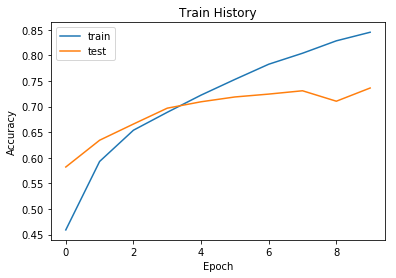

In [26]:
show_train_history('acc','val_acc')

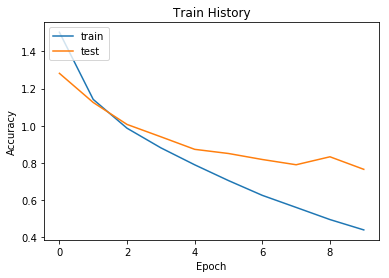

In [27]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7339

# 進行預測

In [29]:
prediction=model.predict_classes(x_img_test_normalize)

 9984/10000 [============================>.] - ETA: 0s

In [30]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

# 查看預測結果

In [31]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

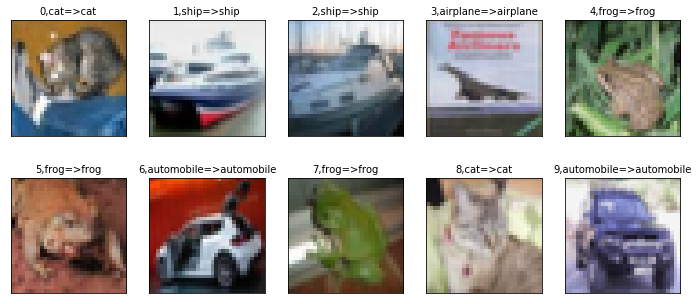

In [33]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [34]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [35]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


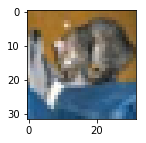

airplane Probability:0.007275202
automobile Probability:0.003484705
bird Probability:0.011789843
cat Probability:0.521885097
deer Probability:0.011080682
dog Probability:0.382938087
frog Probability:0.032875706
horse Probability:0.005801901
ship Probability:0.016262261
truck Probability:0.006606583


In [36]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


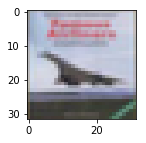

airplane Probability:0.755786240
automobile Probability:0.002187771
bird Probability:0.016898982
cat Probability:0.001257468
deer Probability:0.004320458
dog Probability:0.000057983
frog Probability:0.000155273
horse Probability:0.000030577
ship Probability:0.217318073
truck Probability:0.001987258


In [37]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [38]:
prediction.shape

(10000,)

In [39]:
y_label_test.shape

(10000, 1)

In [40]:
y_label_test

array([[3],
       [8],
       [8],
       ..., 
       [5],
       [1],
       [7]])

In [41]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [42]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,820,7,49,12,15,1,19,5,48,24
1,25,817,19,13,8,4,14,5,30,65
2,57,4,636,25,94,54,95,21,8,6
3,23,8,99,460,76,165,129,21,8,11
4,20,1,66,33,743,22,80,26,8,1
5,15,1,70,129,56,628,64,29,3,5
6,3,3,33,26,21,13,896,3,2,0
7,16,2,50,23,83,64,16,740,5,1
8,69,21,21,12,10,9,17,1,825,15


In [43]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [44]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [45]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [46]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
